# Linear Regression with One Variable

In [6]:
# Reading the data
import pandas as pd

# Plotting data (scatterplot)
import seaborn as sns

# For mathematical operations
import numpy as np

# Plotting data (Straight line)
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('data/ex1data1.txt',header = None, names = ['Population', 'Profit'])
print(df)

    Population    Profit
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
..         ...       ...
92      5.8707   7.20290
93      5.3054   1.98690
94      8.2934   0.14454
95     13.3940   9.05510
96      5.4369   0.61705

[97 rows x 2 columns]


[Text(0.5, 0, 'Population of City in 10,000s'),
 Text(0, 0.5, 'Profit in $10,000s'),
 Text(0.5, 1.0, 'Scatter plot of training data')]

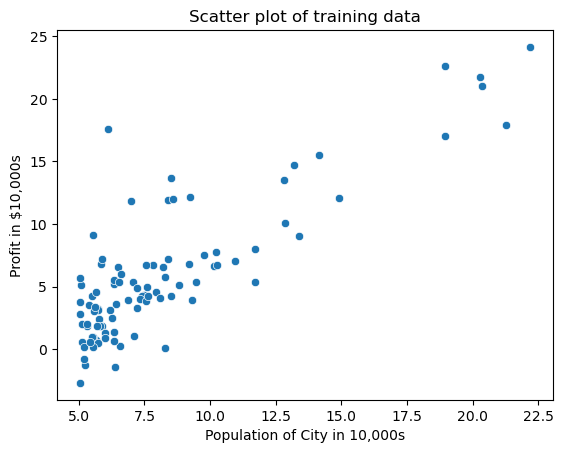

In [10]:
data_visualize = sns.scatterplot(x = 'Population', y = 'Profit', data=df)
data_visualize.set(xlabel='Population of City in 10,000s', ylabel='Profit in $10,000s', title='Scatter plot of training data')

In [50]:
m = df.shape[0]
# print(m)

# We will be having theta0 for bias and theta1 for multiplication, so we need to increase one dimension in input for bias 
X = np.hstack((np.ones((m,1)), df.Population.values.reshape(-1,1)))
#print(X)

Y = np.array(df.Profit.values).reshape(-1,1)
# print(Y)

theta = np.zeros(shape=(X.shape[1],1))
# print(theta)

In [14]:
iterations = 1500
alpha = 0.01

# This function returns the updated value of J after computing as per the equation, J 
# is mean error cross function..

def compute_cost_one_variable(X, Y, theta):
    m = Y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * (np.sum((h - Y)**2))
    return J

In [16]:
J = compute_cost_one_variable(X, Y, theta)
print('With theta = [0 ; 0]\nCost computed =', J)
print('Expected cost value (approx) 32.07')

With theta = [0 ; 0]
Cost computed = 32.072733877455676
Expected cost value (approx) 32.07


In [18]:
# Verification..
sum = 0
for x in df['Profit']:
    sum += x * x
    
res = sum * (1/(2*m))

print('Avg should be 32.07', res)

Avg should be 32.07 32.072733877455654


In [20]:
J = compute_cost_one_variable(X, Y, [[-1],[2]])
print('With theta = [-1 ; 2]\nCost computed =', J)
print('Expected cost value (approx) 54.24')

With theta = [-1 ; 2]
Cost computed = 54.24245508201238
Expected cost value (approx) 54.24


In [22]:
# Now we will update the values of w and b as we studied..

def gradient_descent(X, Y, theta, alpha, iterations):
    m = Y.shape[0]
    
    for i in range(0, iterations):
        h = X.dot(theta) # h ==> m * 1 dimension 
        diff_hy = h - Y  # diff_hy ==> m * 1 dimension
    
        delta = (1/m) * (diff_hy.T.dot(X)) # delta ==> 1 * 2 dimension
        theta = theta - (alpha * delta.T)  # theta ==> 2 * 1 dimension 
    
    return theta

In [24]:
theta = gradient_descent(X, Y, theta, alpha, iterations)
print('Theta found by gradient descent:\n', theta)
print('Expected theta values (approx)\n -3.6303\n  1.1664')

Theta found by gradient descent:
 [[-3.87805118]
 [ 1.1912525 ]]
Expected theta values (approx)
 -3.6303
  1.1664


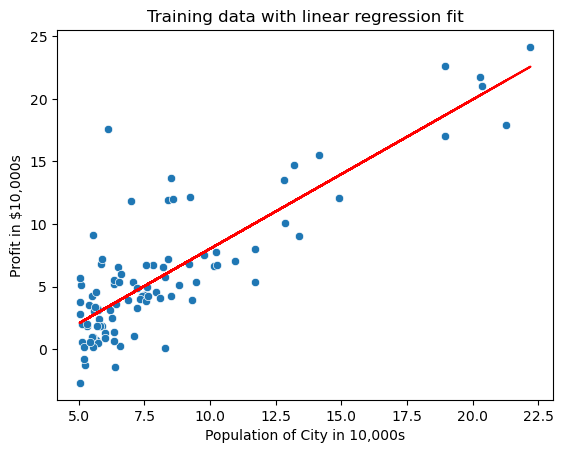

In [26]:
ax = sns.scatterplot(x='Population', y='Profit', data=df)
plt.plot(X[:,1], X.dot(theta), color='r')
ax.set(xlabel='Population of City in 10,000s', ylabel='Profit in $10,000s', title='Training data with linear regression fit');

In [28]:
y_pred = (np.array([1,3.5])).dot(theta)
print('For a population of', 3.5 * 10000, 'predicted profit = $', y_pred[0] * 10000)

For a population of 35000.0 predicted profit = $ 2913.325861011238


In [30]:
y_pred = (np.array([1,7])).dot(theta)
print('For a population of', 7 * 10000, 'predicted profit = $', y_pred[0] * 10000)

For a population of 70000 predicted profit = $ 44607.16347252418


# Equivalent Code using Scikitlearn

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

Xtrain = df.Population.values.reshape(-1,1)
print(Xtrain)

Ytrain = df.Profit.values.reshape(-1,1)
print(Ytrain)

lin_reg.fit(Xtrain, Ytrain)

[[ 6.1101]
 [ 5.5277]
 [ 8.5186]
 [ 7.0032]
 [ 5.8598]
 [ 8.3829]
 [ 7.4764]
 [ 8.5781]
 [ 6.4862]
 [ 5.0546]
 [ 5.7107]
 [14.164 ]
 [ 5.734 ]
 [ 8.4084]
 [ 5.6407]
 [ 5.3794]
 [ 6.3654]
 [ 5.1301]
 [ 6.4296]
 [ 7.0708]
 [ 6.1891]
 [20.27  ]
 [ 5.4901]
 [ 6.3261]
 [ 5.5649]
 [18.945 ]
 [12.828 ]
 [10.957 ]
 [13.176 ]
 [22.203 ]
 [ 5.2524]
 [ 6.5894]
 [ 9.2482]
 [ 5.8918]
 [ 8.2111]
 [ 7.9334]
 [ 8.0959]
 [ 5.6063]
 [12.836 ]
 [ 6.3534]
 [ 5.4069]
 [ 6.8825]
 [11.708 ]
 [ 5.7737]
 [ 7.8247]
 [ 7.0931]
 [ 5.0702]
 [ 5.8014]
 [11.7   ]
 [ 5.5416]
 [ 7.5402]
 [ 5.3077]
 [ 7.4239]
 [ 7.6031]
 [ 6.3328]
 [ 6.3589]
 [ 6.2742]
 [ 5.6397]
 [ 9.3102]
 [ 9.4536]
 [ 8.8254]
 [ 5.1793]
 [21.279 ]
 [14.908 ]
 [18.959 ]
 [ 7.2182]
 [ 8.2951]
 [10.236 ]
 [ 5.4994]
 [20.341 ]
 [10.136 ]
 [ 7.3345]
 [ 6.0062]
 [ 7.2259]
 [ 5.0269]
 [ 6.5479]
 [ 7.5386]
 [ 5.0365]
 [10.274 ]
 [ 5.1077]
 [ 5.7292]
 [ 5.1884]
 [ 6.3557]
 [ 9.7687]
 [ 6.5159]
 [ 8.5172]
 [ 9.1802]
 [ 6.002 ]
 [ 5.5204]
 [ 5.0594]
 [ 5.7077]

LinearRegression()

In [32]:
lin_reg.intercept_, lin_reg.coef_

(array([-3.89578088]), array([[1.19303364]]))

In [33]:
Xtest = [[7]]
y_pred = lin_reg.predict(Xtest)
print(y_pred * 10000)

[[44554.54631015]]


# Linear Regression with One Variable and without Vectorization

In [34]:
df.head(5)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


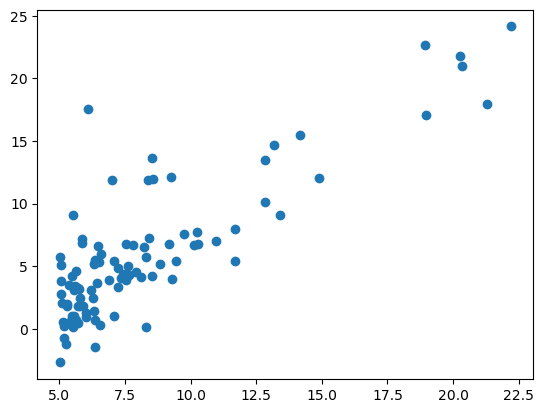

In [35]:
plt.scatter(df['Population'], df['Profit'])

In [43]:
def cost_function_J(data, w, b):
    m = len(data)
    total_error = 0
    
    for i in range(m):
        E = w * df['Population'][i] + b  - df['Profit'][i]
        total_error += E * E
    
    
    return (total_error/(2*m))

In [44]:
print(cost_function_J(df, 0, 0))

32.072733877455654


In [45]:
def gradient_descent_BF(data, w, b, alpha, iterations):
    
    m = len(data)
    
    for j in range(iterations):
        wc = 0
        bc = 0
        for i in range(m):
            
            wc += (w * df['Population'][i] + b - df['Profit'][i]) * df['Population'][i]
            bc += (w * df['Population'][i] + b - df['Profit'][i])
        
        w = w - alpha * (1/m) * wc
        b = b - alpha * (1/m) * bc
    
    return w, b

In [46]:
w_BF, b_BF = gradient_descent_BF(df, 0, 0, alpha, iterations)
print(w_BF, b_BF)

1.166362350335582 -3.63029143940436


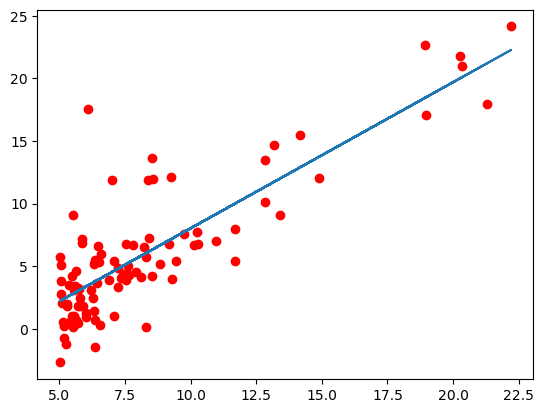

In [48]:
plt.scatter(df['Population'], df['Profit'], color='red')
plt.plot(df['Population'], w_BF * df['Population'] + b_BF)

# Linear Regression with Multiple Features/Variables

In [61]:
df = pd.read_csv('data/ex1data2.txt', header=None, names = ['Size', 'Bedrooms', 'Price'])
df.head(5)

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [62]:
df.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

We can speed up gradient descent by having each of our input values in roughly the same range, ideally −1≤xi≤1
 or −0.5≤xi≤0.5
.

Feature scaling: involves dividing the input values by the range (i.e. the maximum value minus the minimum value) of the input variable.

Mean normalization: involves subtracting the average value for an input variable from the values for that input variable

xi:=(xi−μi) / si

, where μi
 is the average of all the values for features (i) and si
 is the range of values (max-min), the standard deviation.